## 라이브러리 설치 및 로드

In [13]:
!pip install missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 162.1 MB/s eta 0:00:0000:01


In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# 문자열 길이 제한 없애기
pd.set_option('display.max_colwidth', None)

## 데이터 로드

In [3]:
book_tags = pd.read_csv('data/GoodBooks/book_tags.csv')
book_tags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


In [4]:
books = pd.read_csv('data/GoodBooks/books.csv')
books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m/7130616.jpg,https://images.gr-assets.com/books/1307445460s/7130616.jpg
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m/77431.jpg,https://images.gr-assets.com/books/1455373531s/77431.jpg
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m/8565083.jpg,https://images.gr-assets.com/books/1279214118s/8565083.jpg


In [4]:
books['image_url'].head()

0    https://images.gr-assets.com/books/1447303603m/2767052.jpg
1          https://images.gr-assets.com/books/1474154022m/3.jpg
2      https://images.gr-assets.com/books/1361039443m/41865.jpg
3       https://images.gr-assets.com/books/1361975680m/2657.jpg
4       https://images.gr-assets.com/books/1490528560m/4671.jpg
Name: image_url, dtype: object

In [5]:
print(books.columns)

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')


In [5]:
ratings = pd.read_csv('data/GoodBooks/ratings.csv')
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [6]:
tags = pd.read_csv('data/GoodBooks/tags.csv')
tags

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
...,...,...
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ


In [7]:
to_read = pd.read_csv('data/GoodBooks/to_read.csv')
to_read

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
...,...,...
912700,39374,1049
912701,10492,5180
912702,21879,4827
912703,21879,6642


## 기초 통계

In [18]:
book_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [19]:
book_tags.describe()

,goodreads_book_id,tag_id,count
count,9.999120e+05,999912.000000,999912.000000
mean,5.263442e+06,16324.527073,208.869633
std,7.574057e+06,9647.846196,3501.265173
min,1.000000e+00,0.000000,-1.000000
25%,4.622700e+04,8067.000000,7.000000
50%,3.948410e+05,15808.000000,15.000000
75%,9.378297e+06,24997.000000,40.000000
max,3.328864e+07,34251.000000,596234.000000


In [20]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


In [21]:
ratings.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [22]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [23]:
tags.describe()

,tag_id
count,34252.000000
mean,17125.500000
std,9887.845047
min,0.000000
25%,8562.750000
50%,17125.500000
75%,25688.250000
max,34251.000000


In [24]:
to_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


In [25]:
to_read.describe()

,user_id,book_id
count,912705.000000,912705.000000
mean,27668.980115,2454.739538
std,14775.096388,2626.359921
min,1.000000,1.000000
25%,15507.000000,360.000000
50%,27799.000000,1381.000000
75%,40220.000000,3843.000000
max,53424.000000,10000.000000


In [26]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [27]:
books.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


## 결측치 확인

In [9]:
books.isna().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

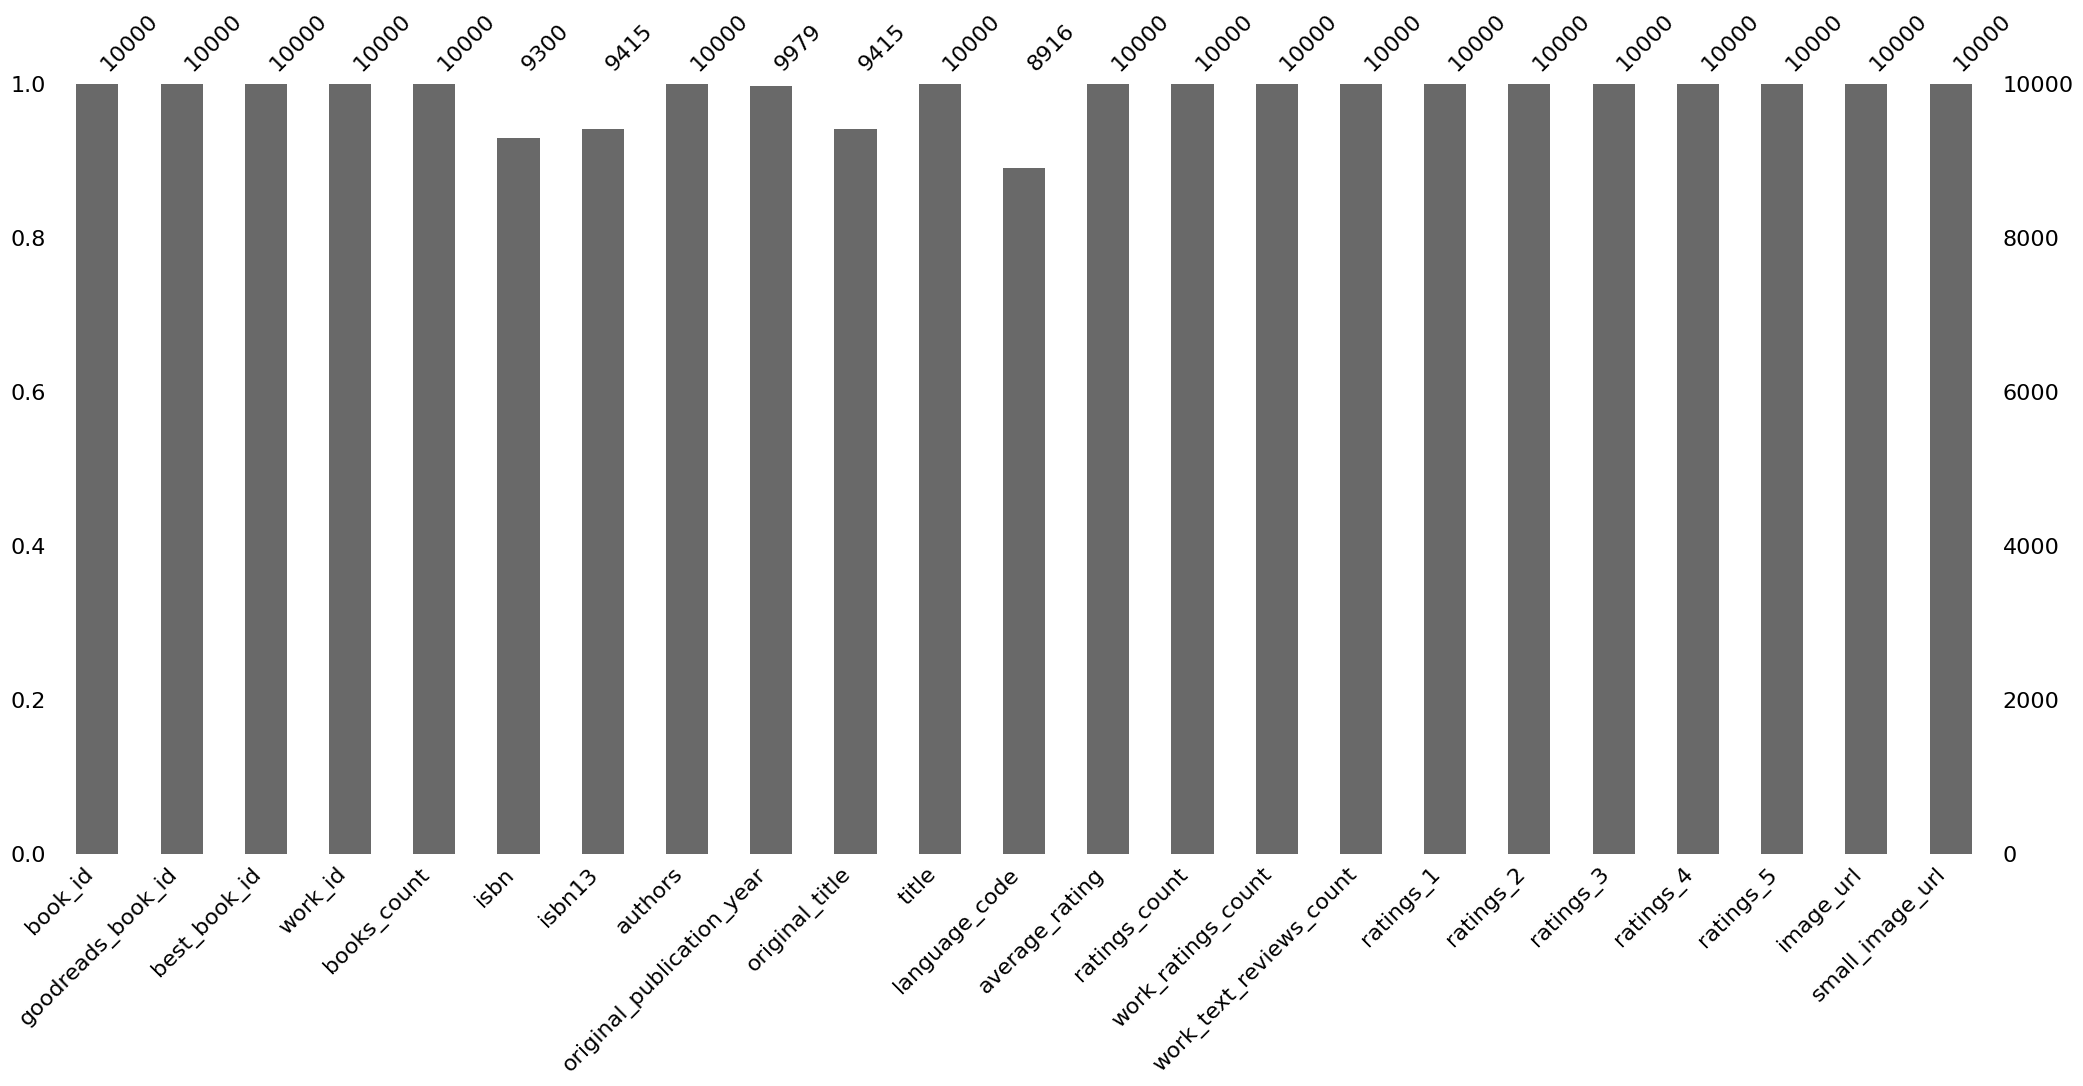

In [16]:
msno.bar(books)
plt.show()

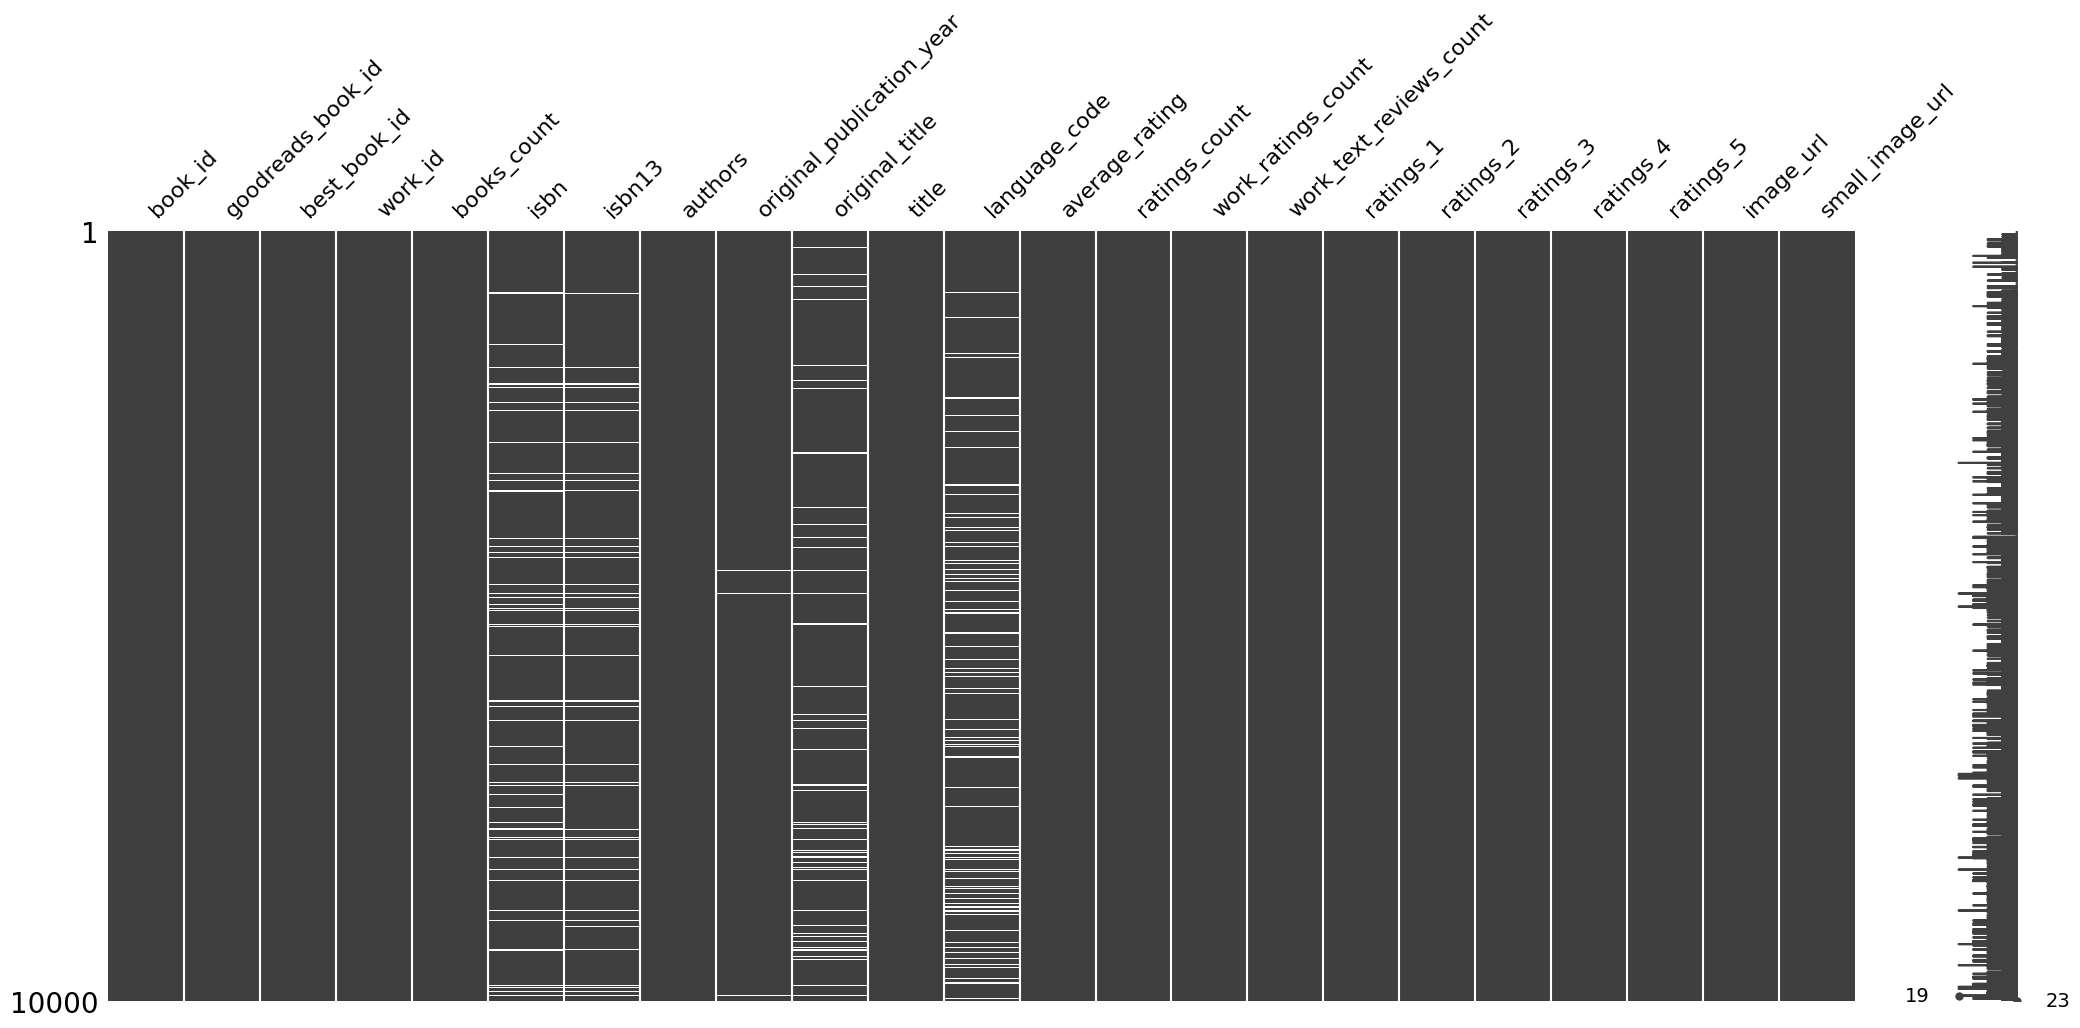

In [17]:
msno.matrix(books)
plt.show()

In [9]:
books['original_publication_year'].describe()

count    9979.000000
mean     1981.987674
std       152.576665
min     -1750.000000
25%      1990.000000
50%      2004.000000
75%      2011.000000
max      2017.000000
Name: original_publication_year, dtype: float64

In [7]:
## original_publication_year 칼럼 결측치를 9999로 변경
books['original_publication_year'].fillna(9999, inplace=True)

In [8]:
# 다른 결측치 있는 열 삭제
books = books.dropna(how='any')

In [13]:
books.isna().sum()

book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64

In [10]:
ratings.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [11]:
tags.isna().sum()

tag_id      0
tag_name    0
dtype: int64

In [8]:
book_tags.isna().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

In [12]:
to_read.isna().sum()

user_id    0
book_id    0
dtype: int64

## books 테이블 평점 칼럼 평가

In [7]:
books1 = books.copy()

# 총 평점 수 계산
books1["total_ratings"] = books1[["ratings_1", "ratings_2", "ratings_3", "ratings_4", "ratings_5"]].sum(axis=1)

# 평균 평점 계산
books1["calculated_avg_rating"] = (
    (1 * books1["ratings_1"] +
     2 * books1["ratings_2"] +
     3 * books1["ratings_3"] +
     4 * books1["ratings_4"] +
     5 * books1["ratings_5"]) /
    books1["total_ratings"]
)

# 평균 평점 비교
books1["is_match"] = books1["average_rating"].round(2) == books1["calculated_avg_rating"].round(2)
books1['is_match'].sum()

10000

## books 테이블 author열 길이 확인

In [16]:
max_length = books['authors'].apply(lambda x: len(str(x))).max()
max_length

742

## 데이터 MySQL에 적재

In [8]:
import mysql.connector

In [9]:
host_ip="15.168.145.74"
user_id="spark_user"
user_password="1234"

In [10]:
connection = mysql.connector.connect(
    host=host_ip,
    user=user_id,
    password=user_password,
    charset='utf8mb4'
)

cursor = connection.cursor()

In [4]:
# 데이터베이스 생성
cursor.execute("CREATE DATABASE IF NOT EXISTS books_db CHARACTER SET utf8mb4 COLLATE utf8mb4_unicode_ci;")
cursor.execute("USE books_db;")


# 테이블 생성
create_books_table = """
CREATE TABLE IF NOT EXISTS books (
    book_id INT PRIMARY KEY,
    goodreads_book_id INT UNIQUE,
    title VARCHAR(255),
    authors VARCHAR(800),
    average_rating FLOAT,
    ratings_count INT,
    original_publication_year INT,
    image_url VARCHAR(255),
    small_image_url VARCHAR(255)
);
"""
create_tags_table = """
CREATE TABLE IF NOT EXISTS tags (
    tag_id INT PRIMARY KEY,
    tag_name VARCHAR(255)
);
"""
create_book_tags_table = """
CREATE TABLE IF NOT EXISTS book_tags (
    goodreads_book_id INT,
    tag_id INT,
    count INT,
    PRIMARY KEY (goodreads_book_id, tag_id),
    FOREIGN KEY (goodreads_book_id) REFERENCES books(goodreads_book_id),
    FOREIGN KEY (tag_id) REFERENCES tags(tag_id)
);
"""
create_ratings_table = """
CREATE TABLE IF NOT EXISTS ratings (
    user_id INT,
    book_id INT,
    rating INT,
    PRIMARY KEY (user_id, book_id),
    FOREIGN KEY (book_id) REFERENCES books(book_id)
);
"""
create_to_read_table = """
CREATE TABLE IF NOT EXISTS to_read (
    user_id INT,
    book_id INT,
    PRIMARY KEY (user_id, book_id),
    FOREIGN KEY (book_id) REFERENCES books(book_id)
);
"""

In [ ]:
# 테이블 실행
cursor.execute(create_books_table)
cursor.execute(create_tags_table)
cursor.execute(create_book_tags_table)
cursor.execute(create_ratings_table)
cursor.execute(create_to_read_table)

# 데이터 삽입 함수 (배치 처리)
def insert_data_in_batches(table_name, data, batch_size=10000):
    placeholders = ", ".join(["%s"] * len(data.columns))
    columns = ", ".join(data.columns)
    sql = f"INSERT IGNORE INTO {table_name} ({columns}) VALUES ({placeholders})"

    # 데이터를 배치 크기로 나눠서 삽입
    for i in range(0, len(data), batch_size):
        batch = data.iloc[i:i + batch_size]
        cursor.executemany(sql, batch.values.tolist())
        connection.commit()
        print(f"{i + len(batch)}개 데이터 삽입 완료")

# 데이터 삽입
insert_data_in_batches("books", books[['book_id', 'goodreads_book_id', 'title', 'authors', 'average_rating', 
                                       'ratings_count', 'original_publication_year', 'image_url', 'small_image_url']])
insert_data_in_batches("tags", tags, batch_size=5000)
insert_data_in_batches("book_tags", book_tags, batch_size=5000)
insert_data_in_batches("ratings", ratings, batch_size=5000)
insert_data_in_batches("to_read", to_read, batch_size=5000)

print("모든 데이터가 성공적으로 삽입되었습니다!")

# 연결 종료
cursor.close()
connection.close()

## MySQL에서 PySpark로 데이터 로드

In [11]:
host_ip="15.168.145.74"
user_id="spark_user"
user_password="1234"

In [12]:
import os

os.environ["PYSPARK_SUBMIT_ARGS"] = "--jars /usr/local/lib/mysql-connector-java-5.1.49-bin.jar pyspark-shell"

In [13]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .appName('mysql-pyspark')\
        .getOrCreate()

mysql_url = f"jdbc:mysql://{host_ip}:3306/books_db"

books_df = spark.read.format("jdbc").options(
    url=mysql_url,
    driver="com.mysql.jdbc.Driver",
    dbtable="books",
    user=user_id,
    password=user_password
).load()

tags_df = spark.read.format("jdbc").options(
    url=mysql_url,
    driver="com.mysql.jdbc.Driver",
    dbtable="tags",  
    user=user_id,
    password=user_password
).load()

book_tags_df = spark.read.format("jdbc").options(
    url=mysql_url,
    driver="com.mysql.jdbc.Driver",
    dbtable="book_tags",  
    user=user_id,
    password=user_password
).load()

ratings_df = spark.read.format("jdbc").options(
    url=mysql_url,
    driver="com.mysql.jdbc.Driver",
    dbtable="ratings",  
    user=user_id,
    password=user_password
).load()

to_read_df = spark.read.format("jdbc").options(
    url=mysql_url,
    driver="com.mysql.jdbc.Driver",
    dbtable="to_read",  
    user=user_id,
    password=user_password
).load()

24/12/20 17:28:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Fri Dec 20 17:28:36 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Fri Dec 20 17:28:38 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According

In [9]:
books_df.show(5)

Fri Dec 20 14:56:53 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


+-------+-----------------+--------------------+--------------------+--------------+-------------+-------------------------+--------------------+--------------------+
|book_id|goodreads_book_id|               title|             authors|average_rating|ratings_count|original_publication_year|           image_url|     small_image_url|
+-------+-----------------+--------------------+--------------------+--------------+-------------+-------------------------+--------------------+--------------------+
|      1|          2767052|The Hunger Games ...|     Suzanne Collins|          4.34|      4780653|                     2008|https://images.gr...|https://images.gr...|
|      2|                3|Harry Potter and ...|J.K. Rowling, Mar...|          4.44|      4602479|                     1997|https://images.gr...|https://images.gr...|
|      3|            41865|Twilight (Twiligh...|     Stephenie Meyer|          3.57|      3866839|                     2005|https://images.gr...|https://images.gr...

In [10]:
tags_df.show(5)

+------+--------+
|tag_id|tag_name|
+------+--------+
|     0|       -|
|     1|    --1-|
|     2|   --10-|
|     3|   --12-|
|     4|  --122-|
+------+--------+
only showing top 5 rows



Fri Dec 20 14:56:54 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


In [6]:
book_tags_df.show(5)

Thu Dec 19 14:44:14 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


+-----------------+------+-----+
|goodreads_book_id|tag_id|count|
+-----------------+------+-----+
|                1|   615|  399|
|                1|  1120|  283|
|                1|  1128|  828|
|                1|  1691| 1742|
|                1|  2104| 1022|
+-----------------+------+-----+
only showing top 5 rows



In [7]:
ratings_df.show(5)

Thu Dec 19 14:44:20 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


+-------+-------+------+
|user_id|book_id|rating|
+-------+-------+------+
|      1|      4|     5|
|      1|     10|     4|
|      1|     11|     5|
|      1|     13|     4|
|      1|     16|     3|
+-------+-------+------+
only showing top 5 rows



In [8]:
to_read_df.show(5)

Thu Dec 19 14:44:32 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


+-------+-------+
|user_id|book_id|
+-------+-------+
|     12|      1|
|    192|      1|
|    202|      1|
|    244|      1|
|    253|      1|
+-------+-------+
only showing top 5 rows



## PySpark로 데이터 전처리

In [14]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('pastel')

### 결측치, 이상치 처리

In [16]:
books_df.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in books_df.columns]).show()

+-------+-----------------+-----+-------+--------------+-------------+-------------------------+---------+---------------+
|book_id|goodreads_book_id|title|authors|average_rating|ratings_count|original_publication_year|image_url|small_image_url|
+-------+-----------------+-----+-------+--------------+-------------+-------------------------+---------+---------------+
|      0|                0|    0|      0|             0|            0|                        0|        0|              0|
+-------+-----------------+-----+-------+--------------+-------------+-------------------------+---------+---------------+



Thu Dec 19 15:43:43 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


In [17]:
books_df.select('original_publication_year').describe().show()

+-------+-------------------------+
|summary|original_publication_year|
+-------+-------------------------+
|  count|                     7865|
|   mean|       1985.3825810553083|
| stddev|        258.6722828704945|
|    min|                    -1750|
|    max|                     9999|
+-------+-------------------------+



Thu Dec 19 15:44:18 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


In [52]:
# original_publication_year 이상치 312개 (4.13%)

books_df.filter(
    (books_df['original_publication_year'] < 1900) |
    (books_df['original_publication_year'] == 9999)).count()

Thu Dec 19 15:58:14 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


312

In [49]:
books_df1 = books_df.filter(
    (books_df['original_publication_year'] >= 1900) & 
    (books_df['original_publication_year'] != 9999))

In [50]:
books_df1.select('original_publication_year').describe().show()

+-------+-------------------------+
|summary|original_publication_year|
+-------+-------------------------+
|  count|                     7553|
|   mean|       1996.7193168277506|
| stddev|       20.957258738033282|
|    min|                     1900|
|    max|                     2017|
+-------+-------------------------+



Thu Dec 19 15:57:30 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


Thu Dec 19 15:57:39 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


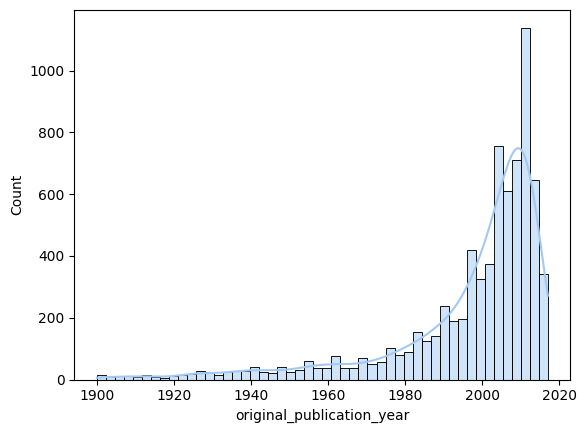

In [51]:
pandas_books_df = books_df1.select('original_publication_year').toPandas()

sns.histplot(pandas_books_df['original_publication_year'], bins=50, kde=True)
plt.show()

In [15]:
# 이상치가 5%미만이므로 제거
books_df = books_df.filter(
(books_df['original_publication_year'] >= 1900) &
(books_df['original_publication_year'] != 9999))

### 중복 있는지 확인

In [58]:
ratings_df.dropDuplicates(subset=['user_id','book_id']).count()

Thu Dec 19 16:20:16 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
24/12/19 16:20:31 WARN TaskMemoryManager: Failed to allocate a page (134217728 bytes), try again.


5314320

In [60]:
ratings_df.count()

Thu Dec 19 16:23:25 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


5314320

In [62]:
book_tags_df.dropDuplicates(subset=['goodreads_book_id','tag_id']).count()

Thu Dec 19 16:28:09 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


786492

In [63]:
book_tags_df.count()

Thu Dec 19 16:28:19 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


786492

### 평균 평점 시각화

Thu Dec 19 16:35:36 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


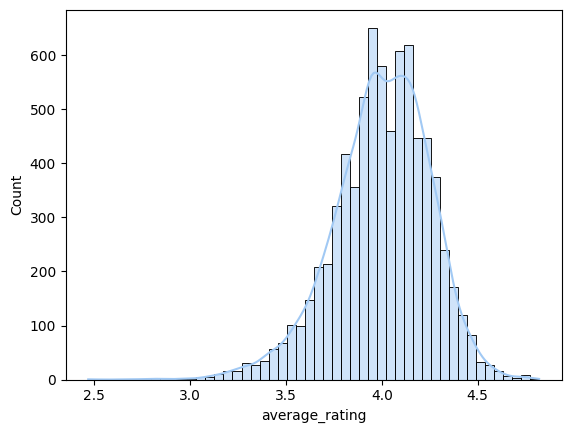

In [64]:
pandas_books_df = books_df.select('average_rating').toPandas()

sns.histplot(pandas_books_df['average_rating'], bins=50, kde=True)
plt.show()

### 평균 평점과 평점 수 상관관계
- 평점은 3.5에서 4.5 사이에 주로 분포
- 평점 수가 적은 책은 평균 평점의 변동성이 큼
- 평점 수가 많을수록 더 신뢰할 수 있는 평균 평점을 가짐
- 평점과 평점 수 사이에 강한 상관관계가 없음
- 많은 평점을 받았다고 해서 평점이 항상 높은 것은 아님

Fri Dec 20 09:51:22 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


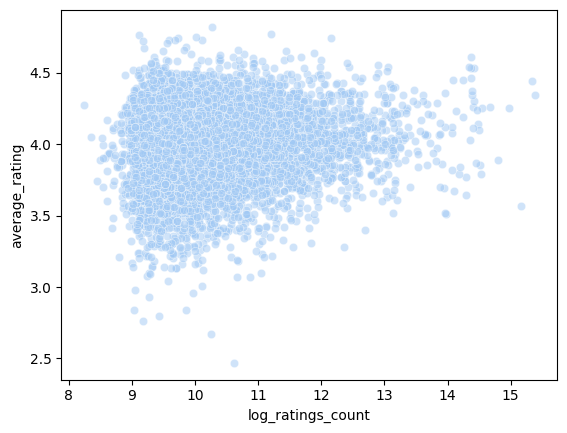

In [14]:
books_df1 = books_df
books_df1 = books_df1.withColumn('log_ratings_count', F.log(F.col('ratings_count')))
books_df1_pandas = books_df1.select('log_ratings_count', 'average_rating').toPandas()

sns.scatterplot(data=books_df1_pandas, x='log_ratings_count',y='average_rating', alpha=0.5)
plt.show()

### 인기 저자 탑 10

Fri Dec 20 09:44:55 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
/tmp/ipykernel_2766/903857657.py:8: FutureWarning:                              

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors_df['book_count'], y=top_authors_df['authors'], palette='pastel')


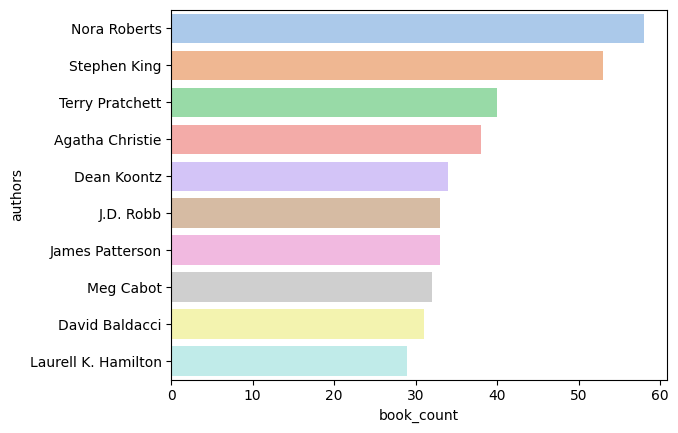

In [10]:
top_authors = books_df.groupBy('authors')\
    .agg(F.count('*').alias('book_count'))\
    .orderBy(F.col('book_count').desc())\
    .limit(10)

top_authors_df = top_authors.toPandas()

sns.barplot(x=top_authors_df['book_count'], y=top_authors_df['authors'], palette='pastel')
plt.show()

### 태그
- 장르
Fiction
Fantasy
Horror
Romance, Romantic
Mystery
Sci-Fi
Series, Sequel
Adventure (Abenteuer)
Thriller
Hero, Avengers
E-book
Audio-book
Comics
Kid, Child
Art
Architecture
Cooking, Cook
Poetry
Health
Travel
Law
Psychology
Chemistry
Engineering
Science
Music
Biography
Business
Crime
History
Religion
Sport

In [65]:
tags_df.select('tag_name').distinct().collect()

Thu Dec 19 16:37:00 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


[Row(tag_name='1000-by-k'),
 Row(tag_name='1970s'),
 Row(tag_name='2-5-oitnb-challenge'),
 Row(tag_name='2010-book-list'),
 Row(tag_name='2013-book-challenge'),
 Row(tag_name='2016-read'),
 Row(tag_name='501-must-read-books'),
 Row(tag_name='5th-grade'),
 Row(tag_name='a-e-book'),
 Row(tag_name='a-shade-of-vampire'),
 Row(tag_name='a-year-of-reading-the-world'),
 Row(tag_name='acceptable-fiction'),
 Row(tag_name='acheron'),
 Row(tag_name='adam-brown'),
 Row(tag_name='adult-plays'),
 Row(tag_name='age-15'),
 Row(tag_name='anime'),
 Row(tag_name='annie-dillard'),
 Row(tag_name='archer-k-a'),
 Row(tag_name='art'),
 Row(tag_name='art---architecture'),
 Row(tag_name='astrid-lindgren'),
 Row(tag_name='athletes-dancers-etc'),
 Row(tag_name='audio-book-read'),
 Row(tag_name='audio-to-listen'),
 Row(tag_name='benjamin-hoff'),
 Row(tag_name='bible-translations'),
 Row(tag_name='biker-mc'),
 Row(tag_name='bill-willingham'),
 Row(tag_name='bonobos'),
 Row(tag_name='books-to-collect'),
 Row(tag_nam

In [6]:
tags_df.filter(tags_df['tag_name'].like('%fantasy%')).show()

Fri Dec 20 10:42:29 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


+------+--------------------+
|tag_id|            tag_name|
+------+--------------------+
|    98|          02-fantasy|
|   119|     05-high-fantasy|
|   124|   07-modern-fantasy|
|   950|   22-modern-fantasy|
|  1139|          50-fantasy|
|  1315|           a-fantasy|
|  1654|       adult-fantasy|
|  1700|adventure-nonfantasy|
|  2050|alien-fiction-fan...|
|  2183| alternative-fantasy|
|  2554|      animal-fantasy|
|  2820|        arab-fantasy|
|  3227|       asian-fantasy|
|  4310|best-audio-epic-f...|
|  4333|        best-fantasy|
|  4334|  best-fantasy-books|
|  4335| best-fantasy-series|
|  5133|     books-fantasy-7|
|  5134|     books-fantasy-8|
|  6873|    children-fantasy|
+------+--------------------+
only showing top 20 rows



## 태그 전처리


In [16]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [17]:
# tags_df에 genre열 추가
tags_df.createOrReplaceTempView("tags")

query = """
SELECT tag_id, tag_name, 
       CASE
           WHEN tag_name LIKE '%fiction%' THEN 'fiction'
           WHEN tag_name LIKE '%fantasy%' THEN 'fantasy'
           WHEN tag_name LIKE '%horror%' THEN 'horror'
           WHEN tag_name LIKE '%romance%' OR tag_name LIKE '%romantic%' THEN 'romance'
           WHEN tag_name LIKE '%mystery%' THEN 'mystery'
           WHEN tag_name LIKE '%sci-fi%' THEN 'sci-fi'
           WHEN tag_name LIKE '%series%' OR tag_name LIKE '%sequel%' THEN 'series'
           WHEN tag_name LIKE '%adventure%' OR tag_name LIKE '%abenteuer%' THEN 'adventure'
           WHEN tag_name LIKE '%thriller%' THEN 'thriller'
           WHEN tag_name LIKE '%hero%' THEN 'hero'
           WHEN tag_name LIKE '%e-book%' THEN 'e-book'
           WHEN tag_name LIKE '%audio-book%' THEN 'audio-book'
           WHEN tag_name LIKE '%comics%' THEN 'comics'
           WHEN tag_name LIKE '%kid%' OR tag_name LIKE '%child%' THEN 'child'
           WHEN tag_name LIKE '%art%' THEN 'art'
           WHEN tag_name LIKE '%architecture%' THEN 'architecture'
           WHEN tag_name LIKE '%cooking%' OR tag_name LIKE '%cook%' THEN 'cooking'
           WHEN tag_name LIKE '%poetry%' THEN 'poetry'
           WHEN tag_name LIKE '%health%' THEN 'health'
           WHEN tag_name LIKE '%travel%' THEN 'travel'
           WHEN tag_name LIKE '%law%' THEN 'law'
           WHEN tag_name LIKE '%psychology%' THEN 'psychology'
           WHEN tag_name LIKE '%chemistry%' THEN 'chemistry'
           WHEN tag_name LIKE '%engineering%' THEN 'engineering'
           WHEN tag_name LIKE '%science%' THEN 'science'
           WHEN tag_name LIKE '%music%' THEN 'music'
           WHEN tag_name LIKE '%biography%' THEN 'biography'
           WHEN tag_name LIKE '%business%' THEN 'business'
           WHEN tag_name LIKE '%crime%' THEN 'crime'
           WHEN tag_name LIKE '%history%' THEN 'history'
           WHEN tag_name LIKE '%religion%' THEN 'religion'
           WHEN tag_name LIKE '%sport%' THEN 'sport'
           ELSE 'other'
       END as genre
FROM tags
"""

tags_df = spark.sql(query)
tags_df.show(5)

Fri Dec 20 17:28:57 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


+------+--------+-----+
|tag_id|tag_name|genre|
+------+--------+-----+
|     0|       -|other|
|     1|    --1-|other|
|     2|   --10-|other|
|     3|   --12-|other|
|     4|  --122-|other|
+------+--------+-----+
only showing top 5 rows



In [8]:
tags_df.show(50)

+------+--------------------+----------+
|tag_id|            tag_name|     genre|
+------+--------------------+----------+
|     0|                   -|     other|
|     1|                --1-|     other|
|     2|               --10-|     other|
|     3|               --12-|     other|
|     4|              --122-|     other|
|     5|              --166-|     other|
|     6|               --17-|     other|
|     7|               --19-|     other|
|     8|                --2-|     other|
|     9|              --258-|     other|
|    10|                --3-|     other|
|    11|               --33-|     other|
|    12|                --4-|     other|
|    13|                --5-|     other|
|    14|               --51-|     other|
|    15|                --6-|     other|
|    16|               --62-|     other|
|    17|                --8-|     other|
|    18|               --99-|     other|
|    19|--available-at-ra...|     other|
|    20|             -2001--|     other|
|    21|        

Fri Dec 20 13:47:10 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


In [18]:
tags_df.createOrReplaceTempView("tags")

# 장르별 빈도수 계산 쿼리
query = """
SELECT genre, COUNT(*) as count
FROM tags
GROUP BY genre
ORDER BY count DESC
"""

# 쿼리 실행
tags_df_genre_count = spark.sql(query)

# 결과 출력
tags_df_genre_count.show(40)

Fri Dec 20 17:28:58 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


+------------+-----+
|       genre|count|
+------------+-----+
|       other|28650|
|      series|  930|
|     fiction|  826|
|         art|  625|
|       child|  520|
|     fantasy|  269|
|      e-book|  259|
|     cooking|  253|
|     romance|  217|
|     history|  211|
|      comics|  154|
|     mystery|  151|
|    thriller|  107|
|      horror|   95|
|     science|   95|
|        hero|   91|
|    business|   91|
|      poetry|   81|
|   biography|   68|
|    religion|   67|
|      health|   62|
|      sci-fi|   59|
|  psychology|   58|
|       crime|   57|
|       music|   54|
|      travel|   53|
|   adventure|   45|
|       sport|   42|
|         law|   41|
| engineering|    8|
|architecture|    5|
|  audio-book|    5|
|   chemistry|    3|
+------------+-----+



In [10]:
tags_df.show(5)

+------+--------+-----+
|tag_id|tag_name|genre|
+------+--------+-----+
|     0|       -|other|
|     1|    --1-|other|
|     2|   --10-|other|
|     3|   --12-|other|
|     4|  --122-|other|
+------+--------+-----+
only showing top 5 rows



Fri Dec 20 13:47:21 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


In [13]:
book_tags_df.show(5)

Fri Dec 20 13:18:01 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


+-----------------+------+-----+
|goodreads_book_id|tag_id|count|
+-----------------+------+-----+
|                1|   615|  399|
|                1|  1120|  283|
|                1|  1128|  828|
|                1|  1691| 1742|
|                1|  2104| 1022|
+-----------------+------+-----+
only showing top 5 rows



In [14]:
ratings_df.show(5)

Fri Dec 20 13:18:09 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


+-------+-------+------+
|user_id|book_id|rating|
+-------+-------+------+
|      1|      4|     5|
|      1|     10|     4|
|      1|     11|     5|
|      1|     13|     4|
|      1|     16|     3|
+-------+-------+------+
only showing top 5 rows



In [15]:
to_read_df.show(5)

Fri Dec 20 13:18:19 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


+-------+-------+
|user_id|book_id|
+-------+-------+
|     12|      1|
|    192|      1|
|    202|      1|
|    244|      1|
|    253|      1|
+-------+-------+
only showing top 5 rows



In [16]:
books_df.show(5)

+-------+-----------------+--------------------+--------------------+--------------+-------------+-------------------------+--------------------+--------------------+
|book_id|goodreads_book_id|               title|             authors|average_rating|ratings_count|original_publication_year|           image_url|     small_image_url|
+-------+-----------------+--------------------+--------------------+--------------+-------------+-------------------------+--------------------+--------------------+
|      1|          2767052|The Hunger Games ...|     Suzanne Collins|          4.34|      4780653|                     2008|https://images.gr...|https://images.gr...|
|      2|                3|Harry Potter and ...|J.K. Rowling, Mar...|          4.44|      4602479|                     1997|https://images.gr...|https://images.gr...|
|      3|            41865|Twilight (Twiligh...|     Stephenie Meyer|          3.57|      3866839|                     2005|https://images.gr...|https://images.gr...

Fri Dec 20 13:18:27 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


## 테이블 조인

In [19]:
# tags_df와 book_tags_df 조인
joined_df = book_tags_df.join(tags_df, on="tag_id", how="inner")\
    .select('goodreads_book_id', 'genre')
joined_df.show(5)

Fri Dec 20 17:29:03 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Fri Dec 20 17:29:03 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

+-----------------+-----+
|goodreads_book_id|genre|
+-----------------+-----+
|             4660|other|
|            22584|other|
|            29187|other|
|            32628|other|
|            99461|other|
+-----------------+-----+
only showing top 5 rows



In [20]:
# books_df 조인
final_joined_df = joined_df.join(books_df, on="goodreads_book_id", how="inner") \
    .select('book_id', 'title', 'authors', 'average_rating', 'genre') \
    .distinct()

final_joined_df.show(5)

Fri Dec 20 17:29:06 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Fri Dec 20 17:29:06 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

+-------+--------------------+--------------------+--------------+-------+
|book_id|               title|             authors|average_rating|  genre|
+-------+--------------------+--------------------+--------------+-------+
|   1375|Me and Earl and t...|       Jesse Andrews|          3.58| e-book|
|   9564|SilverFin (Young ...|      Charlie Higson|           3.8|  crime|
|   3086|Fables and Reflec...|Neil Gaiman, Brya...|          4.45| series|
|   2411|The Winds of War ...|         Herman Wouk|          4.36|fiction|
|    754|   Half Broke Horses|     Jeannette Walls|          4.05|fiction|
+-------+--------------------+--------------------+--------------+-------+
only showing top 5 rows



In [21]:
# ratings_df와 조인
# user_id, book_id, title, rating, authors, average_rating, genre
joined_df = final_joined_df.join(ratings_df, on="book_id", how="inner")\
    .select('user_id', 'book_id', 'title', 'rating','authors', 'average_rating', 'genre')
joined_df.show(5)

Fri Dec 20 17:29:21 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Fri Dec 20 17:29:21 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

+-------+-------+--------------------+------+---------------+--------------+-------+
|user_id|book_id|               title|rating|        authors|average_rating|  genre|
+-------+-------+--------------------+------+---------------+--------------+-------+
|      1|    148|Girl with a Pearl...|     3|Tracy Chevalier|          3.85|history|
|     10|    148|Girl with a Pearl...|     3|Tracy Chevalier|          3.85|history|
|     15|    148|Girl with a Pearl...|     4|Tracy Chevalier|          3.85|history|
|     24|    148|Girl with a Pearl...|     3|Tracy Chevalier|          3.85|history|
|     30|    148|Girl with a Pearl...|     2|Tracy Chevalier|          3.85|history|
+-------+-------+--------------------+------+---------------+--------------+-------+
only showing top 5 rows



## ALS 모델링

In [22]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

In [23]:
als_data = joined_df.select('user_id', 'book_id', 'rating')

als = ALS(userCol='user_id', itemCol='book_id', ratingCol='rating', coldStartStrategy='drop')
model = als.fit(als_data)
predictions = model.transform(als_data)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print(f"Root-mean-square error = {rmse}")

Fri Dec 20 17:30:43 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Fri Dec 20 17:30:43 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

24/12/20 17:34:48 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_164_15 in memory.
24/12/20 17:34:48 WARN MemoryStore: Not enough space to cache rdd_164_15 in memory! (computed 384.0 B so far)
24/12/20 17:34:48 WARN BlockManager: Persisting block rdd_164_15 to disk instead.
24/12/20 17:34:48 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_164_15 in memory.
24/12/20 17:34:48 WARN MemoryStore: Not enough space to cache rdd_164_15 in memory! (computed 384.0 B so far)
24/12/20 17:34:48 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_164_16 in memory.
24/12/20 17:34:48 WARN MemoryStore: Not enough space to cache rdd_164_16 in memory! (computed 384.0 B so far)
24/12/20 17:34:48 WARN BlockManager: Persisting block rdd_164_16 to disk instead.
24/12/20 17:34:48 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for comp

Root-mean-square error = 0.7640719700762676


In [24]:
# 각 사용자에게 10개의 추천 책
user_recommendations = model.recommendForAllUsers(10)
user_recommendations.show()

+-------+--------------------+
|user_id|     recommendations|
+-------+--------------------+
|    148|[{6920, 4.328791}...|
|    463|[{6920, 4.036493}...|
|    471|[{8548, 4.4452477...|
|    496|[{9942, 4.85534},...|
|    833|[{3628, 4.5126524...|
|   1088|[{3628, 4.6276484...|
|   1238|[{9479, 4.318389}...|
|   1342|[{3628, 4.5034027...|
|   1580|[{3628, 4.7228737...|
|   1591|[{6920, 4.826029}...|
|   1645|[{9842, 4.4711795...|
|   1829|[{3628, 4.6880302...|
|   1959|[{422, 3.3805532}...|
|   2122|[{8233, 3.7499032...|
|   2142|[{3628, 4.891313}...|
|   2366|[{862, 5.322742},...|
|   2659|[{422, 4.387258},...|
|   2866|[{3628, 5.054083}...|
|   3175|[{3628, 4.879301}...|
|   3749|[{6920, 3.942501}...|
+-------+--------------------+
only showing top 20 rows



In [25]:
user_recommendations_exploded = user_recommendations.withColumn("exploded", F.explode("recommendations"))
user_recommendations_exploded = user_recommendations_exploded.select("user_id", "exploded.*")
user_recommendations_exploded.show()

+-------+-------+---------+
|user_id|book_id|   rating|
+-------+-------+---------+
|    148|   6920| 4.328791|
|    148|   3628|4.3245955|
|    148|   9566|  4.31228|
|    148|   6590|4.3107533|
|    148|   9842|4.3046684|
|    148|   5207|4.2375093|
|    148|   5580| 4.226124|
|    148|   4483|4.2235036|
|    148|   3491|  4.21586|
|    148|   9569|4.2117405|
|    463|   6920| 4.036493|
|    463|   3628|4.0014787|
|    463|    862|3.9918337|
|    463|   6590|3.9849045|
|    463|   9566| 3.960197|
|    463|   4483|3.9366229|
|    463|   6361|3.9354556|
|    463|   5580|3.9320674|
|    463|   1788|3.9093568|
|    463|   7254| 3.901614|
+-------+-------+---------+
only showing top 20 rows



In [29]:
recommendations_with_details = user_recommendations_exploded.join(
    final_joined_df.select("book_id", "title", "authors", "average_rating", "genre"),
    on="book_id",
    how="left"
)

recommendations_with_details.select(
    "user_id", "book_id", "rating", "title", "authors", "average_rating", "genre"
).show(truncate=False)

Fri Dec 20 17:47:47 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Fri Dec 20 17:47:47 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

+-------+-------+---------+----------------------------------+--------------+--------------+----------+
|user_id|book_id|rating   |title                             |authors       |average_rating|genre     |
+-------+-------+---------+----------------------------------+--------------+--------------+----------+
|18407  |463    |4.450994 |Dragonfly in Amber (Outlander, #2)|Diana Gabaldon|4.31          |other     |
|18407  |463    |4.450994 |Dragonfly in Amber (Outlander, #2)|Diana Gabaldon|4.31          |fiction   |
|18407  |463    |4.450994 |Dragonfly in Amber (Outlander, #2)|Diana Gabaldon|4.31          |series    |
|18407  |463    |4.450994 |Dragonfly in Amber (Outlander, #2)|Diana Gabaldon|4.31          |audio-book|
|18407  |463    |4.450994 |Dragonfly in Amber (Outlander, #2)|Diana Gabaldon|4.31          |adventure |
|18407  |463    |4.450994 |Dragonfly in Amber (Outlander, #2)|Diana Gabaldon|4.31          |sci-fi    |
|18407  |463    |4.450994 |Dragonfly in Amber (Outlander, #2)|Di

In [30]:
recommendations_with_details.filter(F.col("genre") == "fantasy").show()

Fri Dec 20 17:48:47 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Fri Dec 20 17:48:47 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

+-------+-------+---------+--------------------+---------------+--------------+-------+
|book_id|user_id|   rating|               title|        authors|average_rating|  genre|
+-------+-------+---------+--------------------+---------------+--------------+-------+
|    463|  18407| 4.450994|Dragonfly in Ambe...| Diana Gabaldon|          4.31|fantasy|
|    463|  49205|4.1465764|Dragonfly in Ambe...| Diana Gabaldon|          4.31|fantasy|
|    463|  17428|4.5934134|Dragonfly in Ambe...| Diana Gabaldon|          4.31|fantasy|
|    463|  43130|4.4352274|Dragonfly in Ambe...| Diana Gabaldon|          4.31|fantasy|
|    463|  43962| 3.085431|Dragonfly in Ambe...| Diana Gabaldon|          4.31|fantasy|
|    463|   7548|4.0639377|Dragonfly in Ambe...| Diana Gabaldon|          4.31|fantasy|
|    463|  31994|4.1646085|Dragonfly in Ambe...| Diana Gabaldon|          4.31|fantasy|
|    463|  30608| 4.214723|Dragonfly in Ambe...| Diana Gabaldon|          4.31|fantasy|
|   1342|   9900|5.1828184|Night